In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving mix3.JPG to mix3 (1).JPG


In [ ]:
uploaded_file_name = next(iter(uploaded_file))
print(uploaded_file_name)

mix3.JPG


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(uploaded_file_name)
image = cv2.blur(image,(3,3))

In [ ]:
height, width = image.shape[:2]

#画像の端の4点の画素値が黒か判断
#4点とも黒判定の場合、背景は黒として処理
judge_num = 0
if image[0,0][0] < 80 and image[0,0][1] < 80 and image[0,0][2] < 80:
  judge_num = judge_num + 1
if image[0,width - 1][0] < 80 and image[0,width - 1][1] < 80 and image[0,width - 1][2] < 80:
  judge_num = judge_num + 1
if image[height - 1,0][0] < 80 and image[height - 1,0][1] < 80 and image[height - 1,0][2] < 80:
  judge_num = judge_num + 1
if image[height - 1,width - 1][0] < 80 and image[height - 1,width - 1][1] < 80 and image[height - 1,width - 1][2] < 80:
  judge_num = judge_num + 1

In [ ]:
lower = np.array([0,0,0])
if judge_num == 4:
  upper = np.array([100,100,100])
  print('背景は黒')
else :
  upper =np.array([40,40,40])
  print('背景は木')
green = cv2.inRange(image,lower,upper)

背景は黒


In [ ]:
green = cv2.bitwise_not(green)

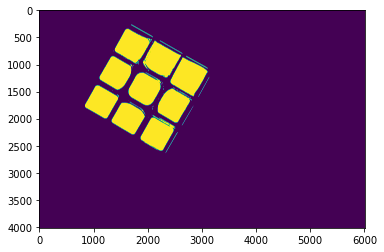

In [ ]:
plt.imshow(green)

In [ ]:
if judge_num ==4:
  kernelSize = max(1, int(0.02 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.erode(green, kernel) # 収縮
  green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.03 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.dilate(green, kernel) # 膨張
  green = cv2.erode(green, kernel) # 収縮
else:
  green = cv2.bitwise_not(green)
  #kernelSize = max(1, int(0.002 * max(width, height))) * 2 + 1
  #kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  #green = cv2.erode(green, kernel) # 収縮
  #green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.075 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.085 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.erode(green, kernel) # 収縮

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

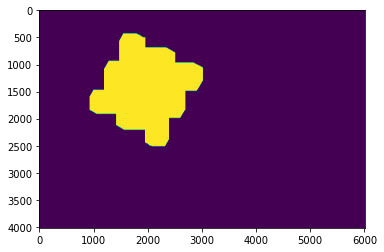

In [ ]:
plt.imshow(green)

In [ ]:
contours, hierarchy = cv2.findContours(green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for i, c in enumerate(contours):
    hull = cv2.convexHull(c) # 凸包

In [ ]:
epsilon = 0.04 * cv2.arcLength(hull, True)
approx = cv2.approxPolyDP(hull, epsilon, True)
print(approx)

[[[3023 1058]]

 [[2326 2508]]

 [[ 932 1838]]

 [[1555  429]]]


In [ ]:
if approx[0][0][0] + approx[0][0][1] < approx[1][0][0] + approx[1][0][1]:
  approx = np.roll(approx,6)
print(approx)

[[[2326 2508]]

 [[ 932 1838]]

 [[1555  429]]

 [[3023 1058]]]


In [ ]:
margin = 13 # マージンの幅
cell_size = 42 # 1マスのサイズ
size = cell_size * 8 + margin * 2 # 変換後の辺の長さ
outer = (254, 0, 0) # マージン部分の色

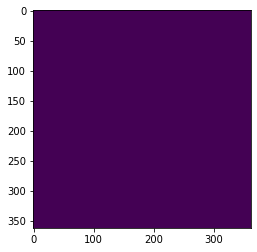

In [ ]:
blank = np.zeros((size,size))
plt.imshow(blank)

In [ ]:
# 移動元の4頂点
src = np.array([approx[2], approx[3], approx[0], approx[1]], dtype=np.float32)
# 移動先の4頂点
dst = np.array([
    [margin, margin],
    [size - 1 - margin, margin],
    [size - 1 - margin, size - 1 - margin],
    [margin, size - 1 - margin]
], dtype=np.float32)

In [ ]:
x_list = [0,0,0,0,0,0,0,0,0]
y_list = [0,0,0,0,0,0,0,0,0]

for i in range(-1,2):
  for j in range(-1,2):
    blank = cv2.circle(blank, (size//2+j*(size//3),size//2+i*(size//3)),3,(255,0,0), thickness=-1)
    # 変換行列
    trans = cv2.getPerspectiveTransform(dst, src)
    # 射影変換
    board = cv2.warpPerspective(blank, trans, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    x = 0
    y = 0
    #c = 0

    for k in range(width):
      for l in range(height):
        if board[l,k] == 255:
          x = x + k
          y = y + l
          #c = c + 1
          break
      else:
        continue
      break

    x_list[4+3*i+j] = x#//c
    y_list[4+3*i+j] = y#//c
    print(x_list[4+3*i+j],y_list[4+3*i+j])
    blank = cv2.circle(blank, (size//2+j*(size//3),size//2+i*(size//3)),3,(0,0,0), thickness=-1)

1653 719
2166 952
2695 1184
1424 1239
1927 1460
2447 1707
1200 1740
1694 1966
2205 2216


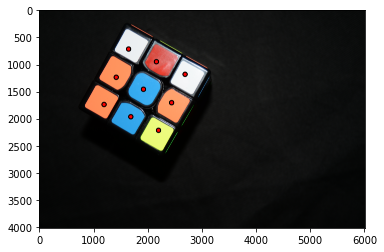

In [ ]:
rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for i in range(9):
  result = cv2.circle(rgbImage, (x_list[i],y_list[i]),50,(0,0,0), thickness=-1)
  result = cv2.circle(rgbImage, (x_list[i],y_list[i]),30,(255,0,0), thickness=-1)

plt.imshow(result)